# Check kinetic momentum with a constant field

In [1]:
import numpy as np

xp_class = np.linspace(0, 2.5, 1000)

py2_class = 4/3*1/4*xp_class**2



In [3]:
import pandas as pd
import numpy as np

Nc = 3

# We create a list with the files to read

file_list = ['/lustre/HQCD/carlos.lamas/qJetLFH_vQM/output/toy_model/result_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_nPx0_nPy0_cQ_%i_hQ_1_mq0_0.100_mq_0.100_mg_0.150_Lperp_2_Nperp_64_Leta_2.500000_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_32/PIperp/evolution_Piperp_sq.dat' %c for c in range(Nc)]

# We read each file into a dataframe of a list

df_list = []
for c in range(Nc):
    df = pd.read_table(file_list[c], header = None)
    df_list.append(df)

# We convert to a numpy array
data = np.array(df_list)

In [4]:
np.shape(data)

(3, 33, 4)

In [5]:
# Exctract broadening and time
xplus = data[0, :, 0]
pkin0 = data[0, :, 3]
pkin1 = data[1, :, 3]
pkin2 = data[2, :, 3]

# Average over color components
pkin = (pkin0 + pkin1 + pkin2) / 3

In [ ]:
# import pandas as pd

# df2 = pd.read_table('/lustre/HQCD/carlos.lamas/qJetLFH_vQM/output/toy_model_delta/result_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_nPx0_nPy0_cQ_1_hQ_1_mq0_0.100_mq_0.100_mg_0.150_Lperp_2_Nperp_64_Leta_2.500000_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_32/PIperp/evolution_Piperp_exp_sq_autonomy.dat', header = None)
# data2 = np.array(df2)

In [ ]:
# yp_av2 = data2[:,2]-data2[0,2]

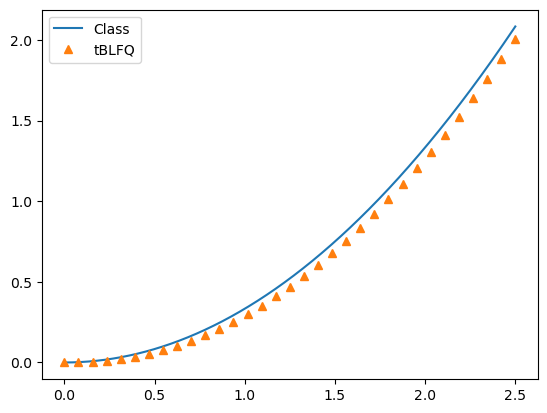

In [8]:
import matplotlib.pyplot as plt

plt.plot(xp_class, py2_class, label='Class')
plt.plot(xplus, pkin, '^', label='tBLFQ')
# plt.plot(xplus, pkin0, 'o', label='c=0')
# plt.plot(xplus, pkin1, 's', label='c=1')
# plt.plot(xplus, pkin2, '*', label='c=2')

# plt.plot(xp, yp_av2, 'o', label=r'$C_F<p_y>^2$')


plt.legend()
plt.savefig('ToyModel.png')

We print component by component and compare with $(gA_y)^2_{cc}$

In [9]:
py2_c0 = 1.62200847*xp_class**2/4
py2_c1 = 1.0446582*xp_class**2/4
py2_c2 = 1.33333333*xp_class**2/4

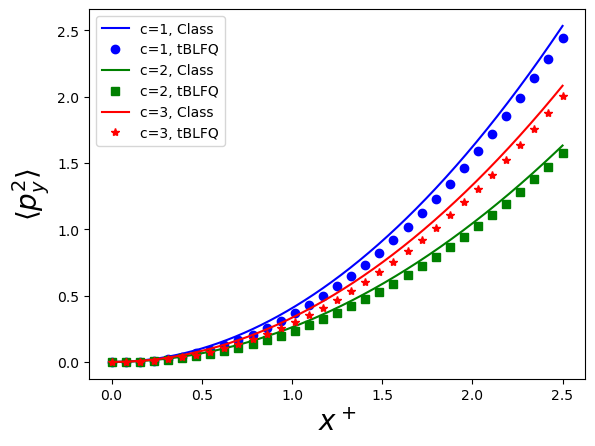

In [18]:
import matplotlib.pyplot as plt

plt.plot(xp_class, py2_c0, 'b', label='c=1, Class')
plt.plot(xplus, pkin0, 'bo', label='c=1, tBLFQ')

plt.plot(xp_class, py2_c1, 'g', label='c=2, Class')
plt.plot(xplus, pkin1, 'gs', label='c=2, tBLFQ')

plt.plot(xp_class, py2_c2, 'r', label='c=3, Class')
plt.plot(xplus, pkin2, 'r*', label='c=3, tBLFQ')

# plt.plot(xp, yp_av2, 'o', label=r'$C_F<p_y>^2$')
plt.xlabel(r'$x^+$', fontsize=20)
plt.ylabel(r'$\langle p_y^2 \rangle$', fontsize=20)


plt.legend()
plt.savefig('Color_Comparison.png')

In [32]:
import pandas as pd

df3 = pd.read_table('/lustre/HQCD/carlos.lamas/qJetLFH_vQM/output/toy_model/result_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_Gaussian_nPx0_nPy0_wx_10.000000_wy_10.000000_cQ_3_hQ_1_mq0_0.100_mq_0.100_mg_0.150_Lperp_2_Nperp_64_Leta_2.500000_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_32/PIperp/evolution_Piperp_sq.dat', header = None)
data3 = np.array(df3)

In [33]:
yp_av3 = data3[:,2]-data3[0,2]

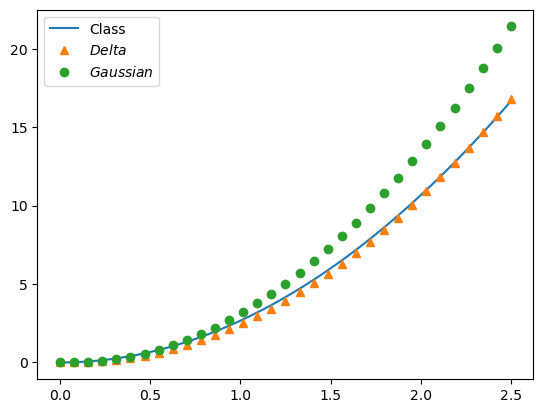

In [34]:
import matplotlib.pyplot as plt

plt.plot(xp_class, py2_class, label='Class')
plt.plot(xp, 8/3*yp2, '^', label=r'$Delta$')
plt.plot(xp, 8/3*yp_av3, 'o', label=r'$Gaussian$')


plt.legend()
plt.savefig('ToyModel_DeltaGaussian.png')